# <center> Ford GoBike Trip Data Visualization for 2018 </center>
  
**by Rishindra Mani Katiyar**

## Investigation Overview

> I investigated when most trips are taken in terms of time of day, day of the week and month of the year. Also
how long an average trip take and if the average trip depend on if a user is a subscriber or customer.

## Dataset Overview

> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Ford_GoBike_data.csv')

#Drop columns that are not important to this analysis
df.dropna(inplace=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
#Add new columns
df['start_month'] = df['start_time'].dt.strftime('%B')
df['start_weekday'] = df['start_time'].dt.strftime('%a')

df['start_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec']/60
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,January,Wed,22,1254.733333
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,January,Wed,16,1423.700000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,January,Wed,14,1192.933333
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,January,Wed,14,1017.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,January,Wed,19,666.100000


## Ford GoBike Weekly Usage by Users

> From the visualization below, we can see that; 
>* Tuesday has the highest number of users followed by Wednesday and Thursday.
>* Saturday and Sunday has the lowest number of users.
>* Monday to Friday has above 250000 users.
>* This means that most users use ford bike mostly on weekdays for commuting purposes during working days. 

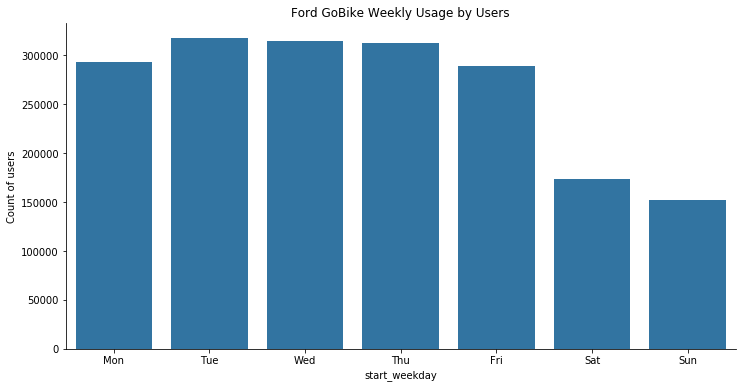

In [3]:
# Ford GoBike Weekly Usage by Users
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(x='start_weekday',data=df,color=base_color, order=weekday)
sb.despine()
plt.title('Ford GoBike Weekly Usage by Users')
plt.ylabel('Count of users');

## Ford GoBike System User Type by Month

> >From the visualization below, we can see that;
>* Customers demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who comes for visit .
>* Subscriber highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders who uses the bike to transport themselves to work.

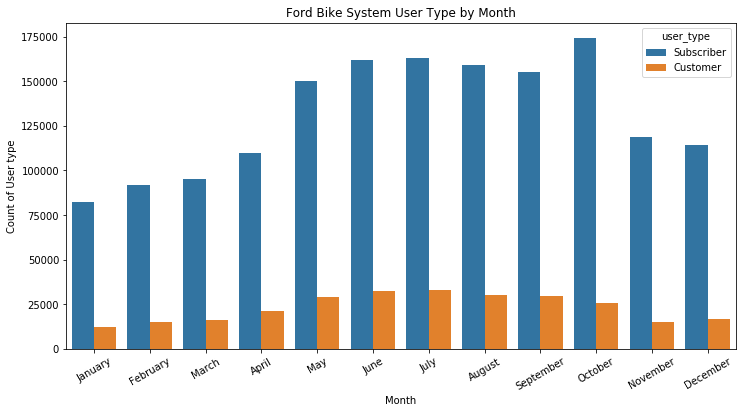

In [4]:
#relationship between start month and user type
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November', 'December']
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_month', hue='user_type',order=month);
plt.xticks(rotation=30);
plt.title('Ford Bike System User Type by Month')
plt.xlabel('Month');
plt.ylabel('Count of User type');

## User Type Duration on Weekdays

>We can see from the visualization below that 
>* Customers use ford bike sharing system bikes for longer period of time.The duration of time is more on weekends than weekdays while Subscribers mostly use the bike for short duration of time on weekdays and on weekends there is an increase in the duration of time.

>* This could mean that customers are casual riders such as tourists or users who just ride for leisure in afternoon or early evenings on weekends while Subscribers use the bike sharing system as a means of transport to work on weekdays (Mon-Fri) and especially during rush hours.

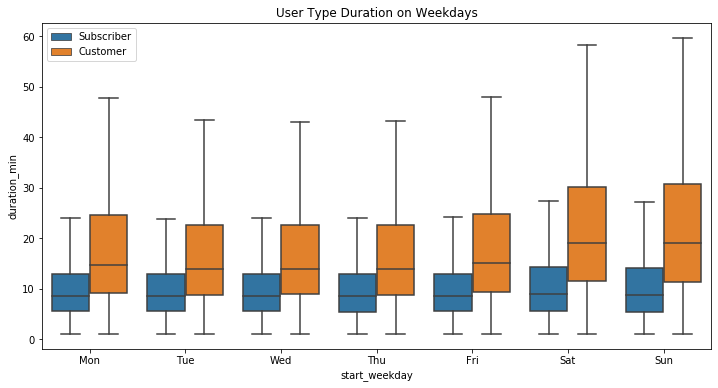

In [5]:
plt.figure(figsize=(12,6))
sb.boxplot(x="start_weekday", y="duration_min", hue="user_type",data=df,showfliers=False,order=weekday)
plt.title('User Type Duration on Weekdays')
plt.legend(loc = 'upper left');

## Hourly Usage during Weekdays for Customers and Subscribers

>From the visualization below, we see can
>* Customers makes use of the bike sharing system heavily on Weekends between the hours of 11am and 5pm from saturday to sunday and lightly on weekdays from 5pm to 6pm, Monday to friday .
>* The rush hour for the bike sharing system for customer was on saturday from 1pm to 3pm.
>* Subscribers makes use of the bike sharing system heavily on Weekdays between the hours of 8am and 9am in the morning and 5pm-6pm in the evening from Monday to Friday.
>* The rush hour for the bike sharing system was 8am in the morning and 5pm in the afternoon


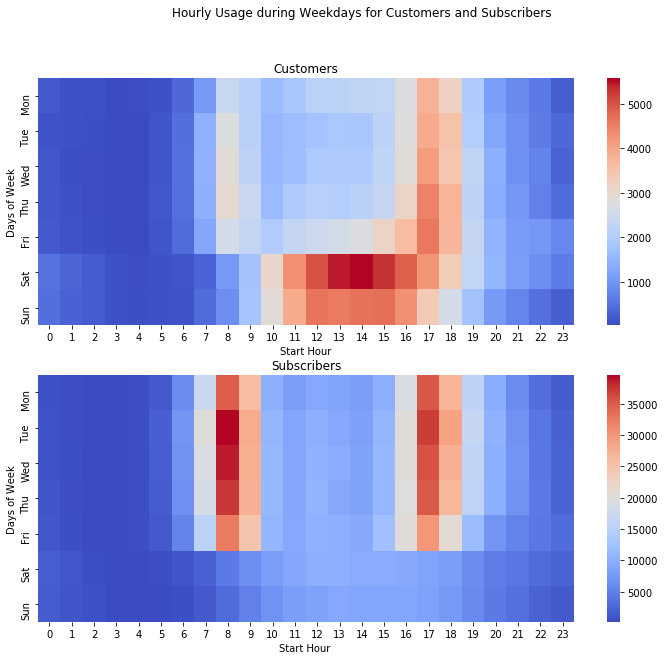

In [6]:
plt.figure(figsize=[12, 10]);
plt.subplot(2, 1, 1)

weekcat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_weekday'] = df['start_weekday'].astype(weekcat)
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')

sb.heatmap(ct_counts, cmap='coolwarm');
plt.title('Customers');
plt.xlabel('Start Hour');
plt.ylabel('Days of Week');


plt.subplot(2, 1, 2)

customers = df.query('user_type == "Subscriber"')
ct_counts = customers.groupby(['start_weekday', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_weekday', columns='start_hour', values='count')

sb.heatmap(ct_counts, cmap='coolwarm');
plt.title('Subscribers');
plt.xlabel('Start Hour ');
plt.ylabel('Days of Week');
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers');
